In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

titanic_color = {
    'First': '#ff6602ff',
    'Second': '#0f7175ff',
    'Third': '#c65dc9ff'
}

titanic_sex_color = {
    'male': '#ff6602ff',
    'female': '#0f7175ff'
}

In [3]:
titanic_df = sns.load_dataset('titanic')
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# ANALISIS EXPLORATORIO DE DATOS
## ¿ QUE TIPO DE DATO TIENEN LAS VARIABLES DEL CONJUNTO DE DATOS?

In [4]:
titanic_df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


## ¿CUÁNTAS VARIABLES DE CADA TIPO DE DATOS TENEMOS EN EL CONJUNTO DE DATOS?

In [20]:
titanic_df.shape[1]

15

In [5]:
titanic_df.dtypes.value_counts()

,count
object,5
int64,4
float64,2
bool,2
category,1
category,1


## CONTEO DE VARIABLES NUMERICAS


In [24]:
titanic_df.describe(include=[np.number])

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## CONTEO DE VARIABLES CATEGORICAS

In [23]:
titanic_df.describe(include=object)

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


¿ CUÁNTAS VARIABLES (filas) Y OBSERVACIONES (columnas) TENEMOS EN EL CONJUNTO DE DATOS?

In [6]:
titanic_df.shape

(891, 15)

## ¿EXISTEN VALORES NULOS EXPLICITOS EN EL COJUNTO DE DATOS?

In [7]:
titanic_df.isnull().any()

,0
survived,False
pclass,False
sex,False
age,True
sibsp,False
parch,False
fare,False
embarked,True
class,False
who,False


In [8]:
titanic_df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [9]:
titanic_df.isnull().sum().sum()

869

## ¿CUANTOS VALORES NULOS TENEMOS POR CADA VARIABLE?

---



In [10]:
titanic_df.isnull().sum().sort_values(ascending=False)

,0
deck,688
age,177
embarked,2
embark_town,2
survived,0
pclass,0
sex,0
sibsp,0
parch,0
fare,0


## ¿ CUÁL ES LA PROPORCIÓN DE VALORES NULOS POR CADA VARIABLE?


In [11]:
plot_null_titanic_df = titanic_df.isnull().melt(value_name='missing')
plot_null_titanic_df

,variable,missing
0,survived,False
1,survived,False
2,survived,False
3,survived,False
4,survived,False
...,...,...
13360,alone,False
13361,alone,False
13362,alone,False
13363,alone,False


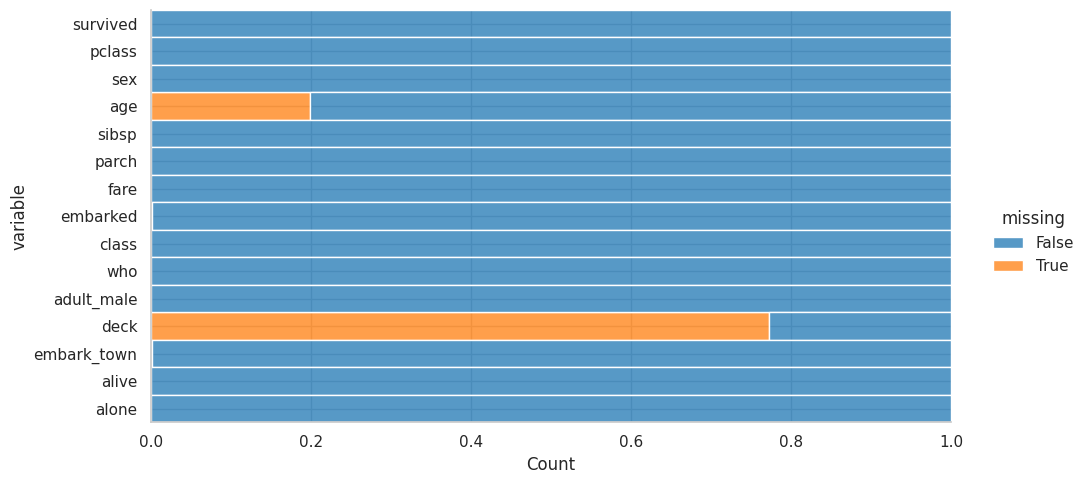

In [12]:
sns.displot(data=plot_null_titanic_df,y='variable',hue='missing',aspect=2,multiple='fill')

## ¿ CÓMO PODEMOS VISUALIZAR LOS VALORES NULOS EN TODO EL CONJUNTO DE DATOS?

<Axes: >

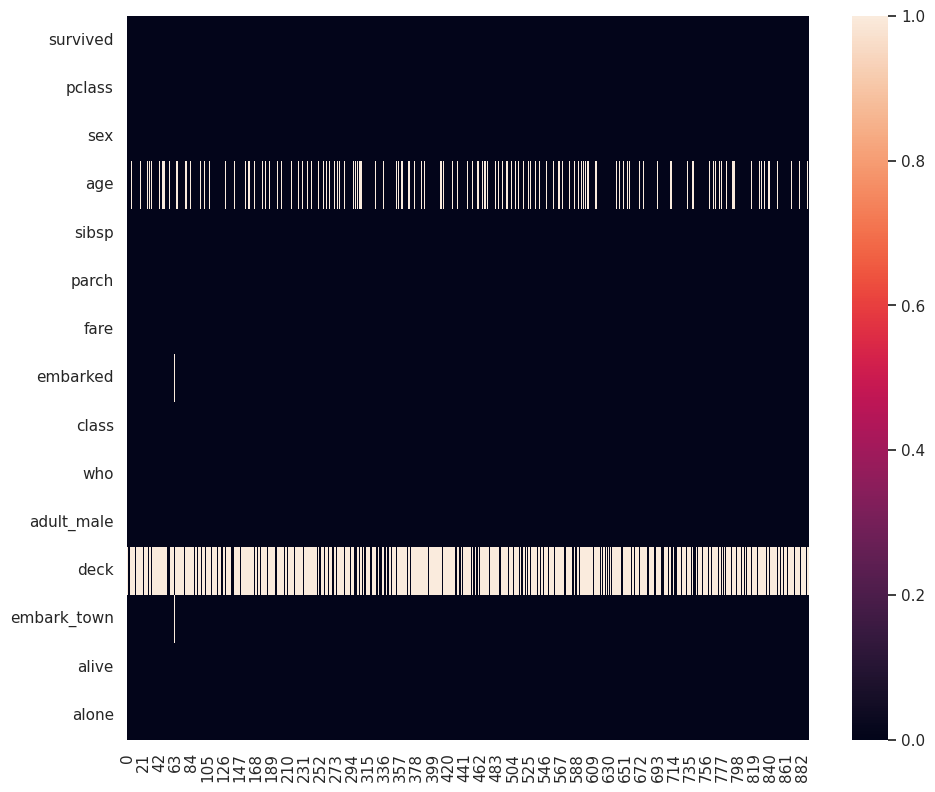

In [13]:
(
    titanic_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

:## ¿CUÁNTAS OBSERVACIONES PERDEMOS SI ELIMINAMOS LOS DATOS FALTANTES?

In [15]:
processed_titanic_df = (
    titanic_df
    .dropna()
)
processed_titanic_df.shape

(182, 15)

In [16]:
titanic_df.shape

(891, 15)

In [17]:
titanic_df.shape[0] - processed_titanic_df.shape[0]

709

In [29]:
(
    titanic_df
    .pclass
    .value_counts()
)

,count
pclass,
3,491
1,216
2,184


<Axes: xlabel='pclass'>

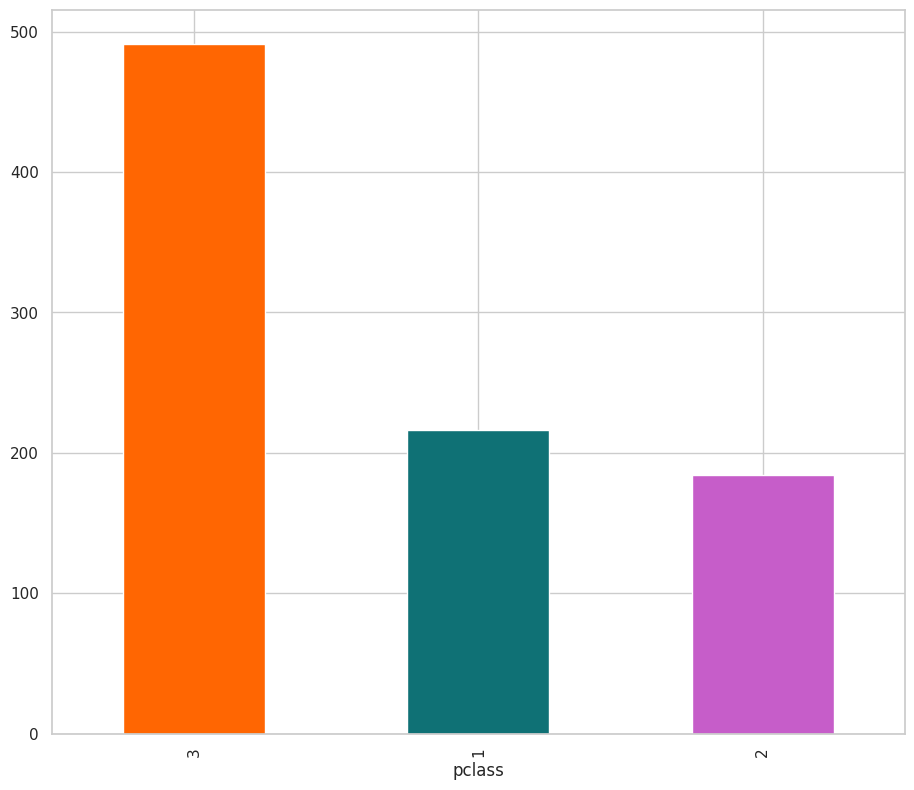

In [28]:
(
    titanic_df
    .pclass
    .value_counts()
    .plot(
        kind='bar',
        color=titanic_color.values()
    )
)

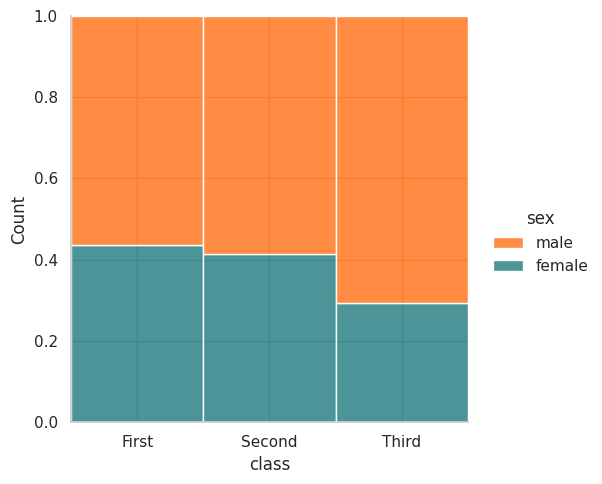

In [34]:
(
    titanic_df
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='class',
                hue='sex',
                multiple='fill',
                palette=titanic_sex_color
            )
        )
    )
)